In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import daft
import seaborn
import matplotlib.pyplot as plt


C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


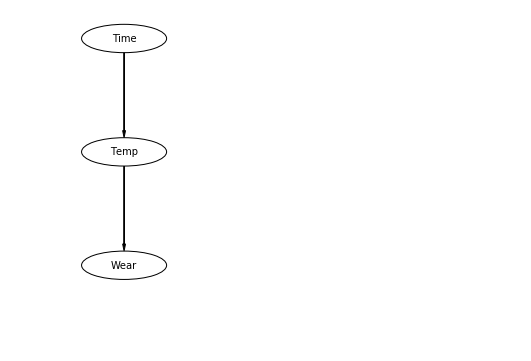

In [2]:
pgm = daft.PGM([9,6],origin=[1, 0.5])
pgm.add_node(daft.Node('Tme','Time',3,6,aspect=3))
pgm.add_node(daft.Node('Temp','Temp',3,4,aspect=3))
pgm.add_node(daft.Node('Wear','Wear',3,2,aspect=3))
pgm.add_edge('Tme','Temp')
pgm.add_edge('Temp','Wear')
pgm.render();


In [3]:
df = pd.read_csv('....Temp.csv',sep=';')

df.index

RangeIndex(start=0, stop=15, step=1)

In [4]:
df.describe()

,Time,Temp,RunningTemp,Wear,Slot
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.466667,146.666667,212.533333,17.133333,8.000000
std,0.639940,63.994047,63.482131,5.208052,4.472136
min,1.000000,100.000000,152.000000,12.000000,1.000000
25%,1.000000,100.000000,163.000000,13.000000,4.500000
50%,1.000000,100.000000,193.000000,16.000000,8.000000
75%,2.000000,200.000000,250.500000,20.000000,11.500000
max,3.000000,300.000000,383.000000,31.000000,15.000000


In [5]:
temp_mean= df.Temp.mean()
temp_mean

146.66666666666666

In [6]:
df.skew()

Time           1.084627
Temp           1.084627
RunningTemp    1.473369
Wear           1.428295
Slot           0.000000
dtype: float64

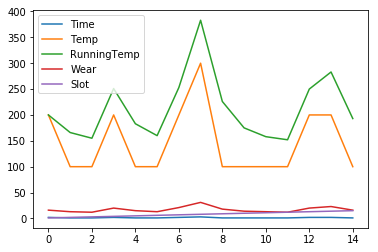

In [7]:
df.plot()
plt.show()

In [8]:
df

,Time,Temp,RunningTemp,Wear,Slot
0,2,200,200,16,1
1,1,100,166,13,2
2,1,100,155,12,3
3,2,200,251,20,4
4,1,100,183,15,5
5,1,100,160,13,6
6,2,200,253,21,7
7,3,300,383,31,8
8,1,100,226,18,9
9,1,100,175,14,10


In [9]:
model = pm.Model();
with model:
    time = pm.Normal('time',df.Time.mean())
    temp = pm.Normal('temp',time)
    wear =pm.Normal('wear',temp)
    trace = pm.sample(100000,tune=5000,progressbar=True)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|████████████████████████████████▉| 104944/105000 [02:15<00:00, 775.78it/s]C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\step_methods\hmc\nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.7119833689463768, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|█████████████████████████████████| 105000/105000 [02:15<00:00, 775.80it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E698198>,
      dtype=object)

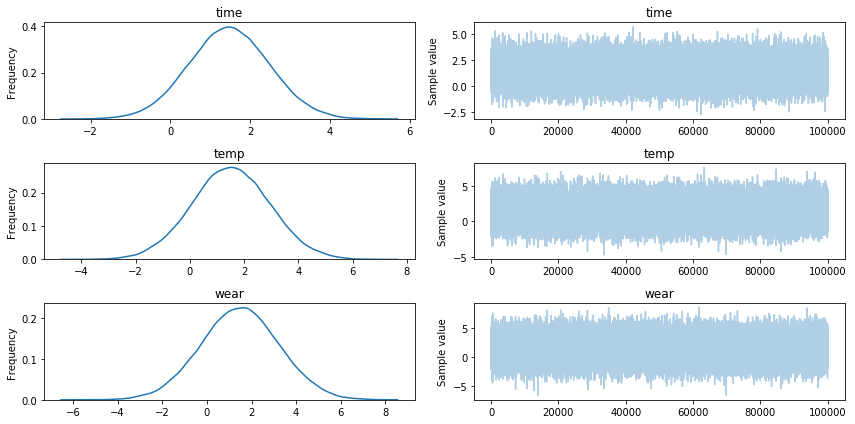

In [10]:
pm.traceplot(trace)

In [11]:
pm.summary(trace)


time:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.472            1.008            0.004            [-0.452, 3.504]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.501         0.796          1.469          2.149          3.463


temp:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.481            1.433            0.007            [-1.377, 4.260]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -1.334         0.518          1.478          2.447          4.311


wear:

  Mean             SD               MC Error         95% HPD interval
  --------------------------

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000102E1E10>,
      dtype=object)

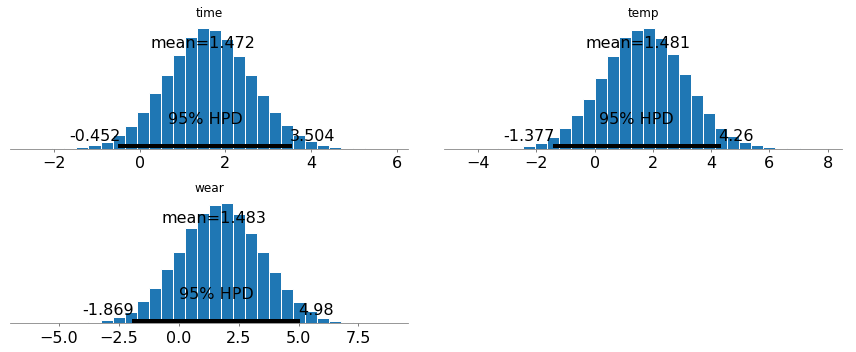

In [12]:
pm.plot_posterior(trace)

In [13]:
pred = pd.DataFrame({
    "Wear": trace["wear"][50000:],
    "Temp": trace["temp"][50000:],
    "Time": trace["time"][50000],
 
})


In [14]:
pred.Wear.mean()


1.4742005368193134

In [15]:
pred.Temp.mean()
loopTime = pred.Time.mean()
loopWear = pred.Wear.mean()
loopTemp = pred.Temp.mean()

In [16]:
loopWear

1.4742005368193134

In [17]:
loopTemp

1.4738282665940343

In [18]:
loopTime

0.3691078902933589

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|█████████████████████████████████| 150000/150000 [03:10<00:00, 785.66it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████████████████████████████| 150000/150000 [03:06<00:00, 806.32it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████████████████████████████| 150000/150000 [03:19<00:00, 751.49it/s]


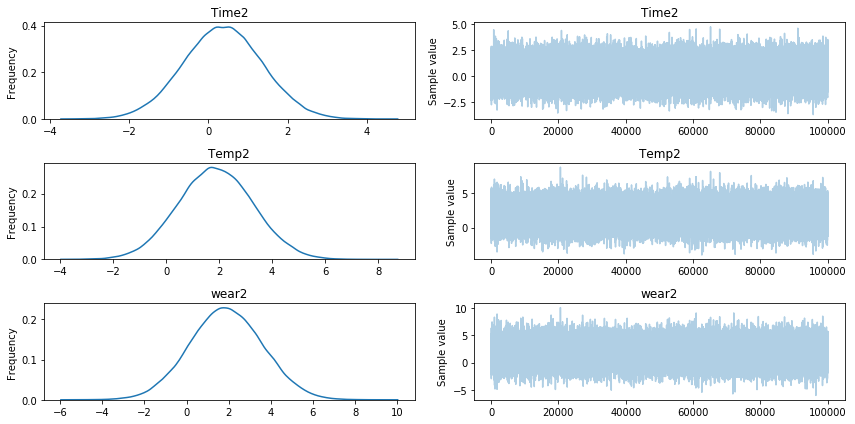

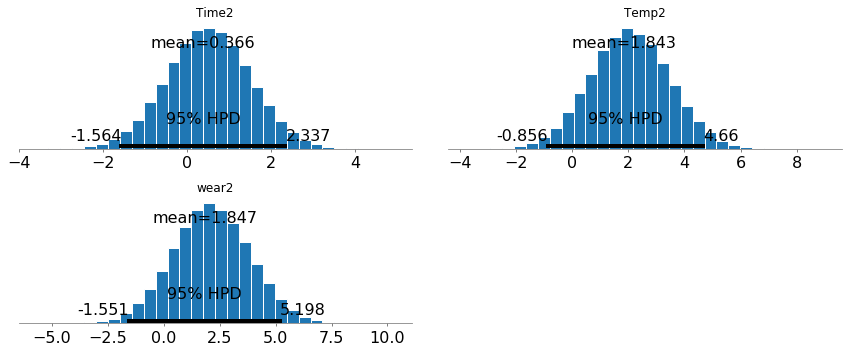

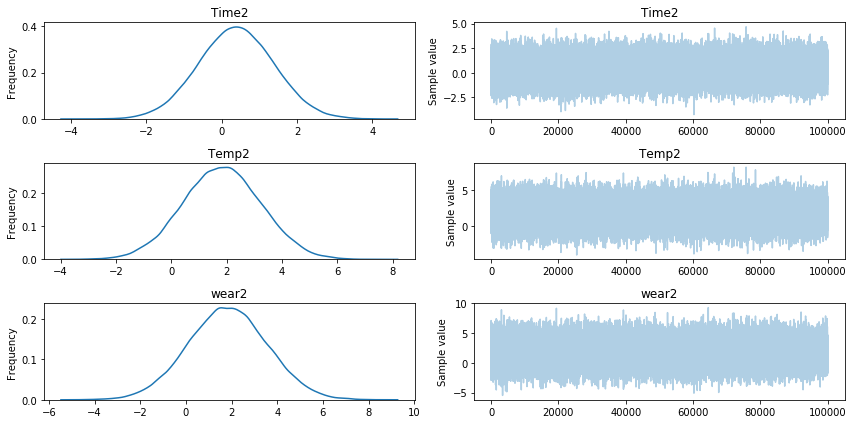

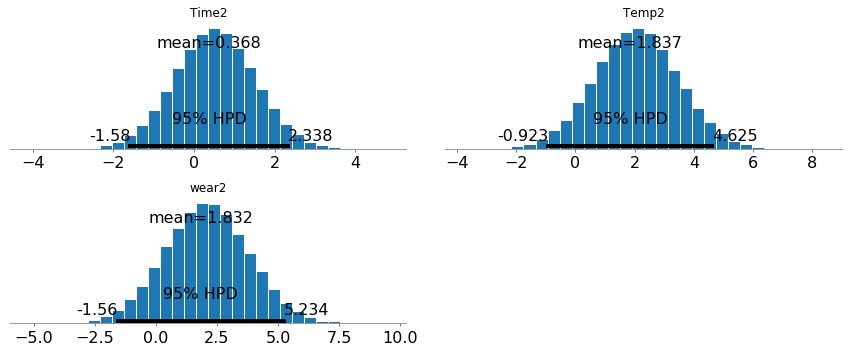

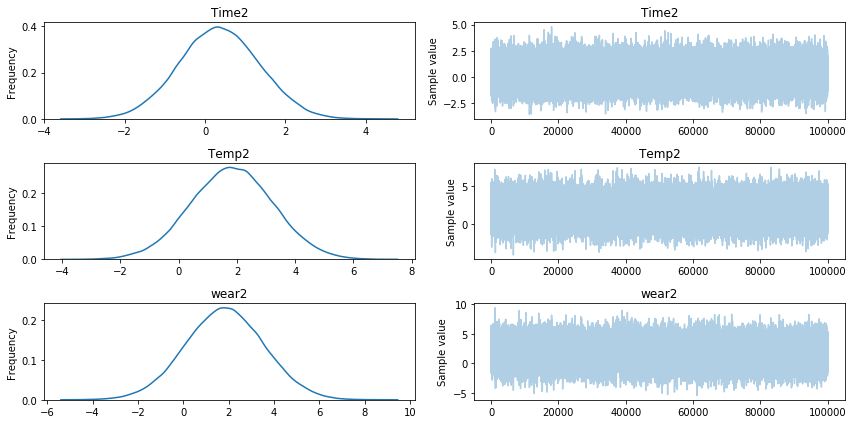

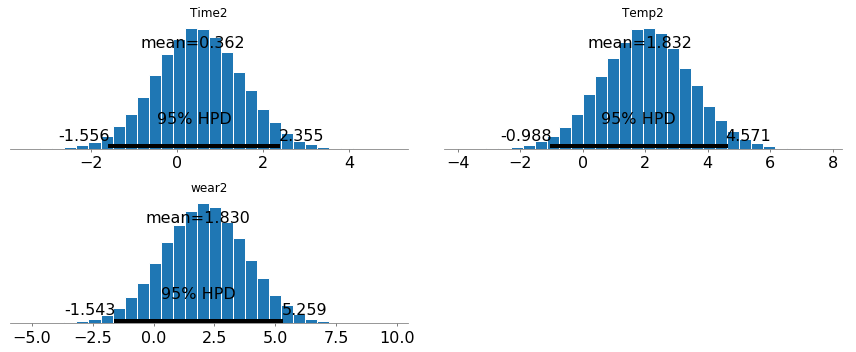

In [20]:
def mymodel(x,y):
    model2 = pm.Model();
    with model2:
        Time2  = pm.Normal('Time2',x)
        Temp2  = pm.Normal('Temp2',Time2+y)
        wear2  = pm.Normal('wear2',Temp2)
        trace2 = pm.sample(100000,tune=50000,progressbar=True)
        pm.traceplot(trace2)
     #   pm.summary(trace2)
        pm.plot_posterior(trace2)
        pred2  = pd.DataFrame({
           "Wear2": trace2["wear2"][50000:],
           "temp2": trace2["Temp2"][50000:],
           "time2": trace2["Time2"][50000:],
            
    })
        loopTime = pred2.time2.mean()
        loopWear = pred2.Wear2.mean()
        loopTime
    
        
for i in range(0,3):
    mymodel(loopTime,loopWear)
    
    
    